In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [5]:
# Read CSV
df = pd.read_csv("articles_1.csv", sep='\t')
df.head()

# output = nltk.pos_tag(text)
# print(output)

,articlesid,fakeid,trueid,title,text,subject,label
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1


In [6]:
stop = stopwords.words('english') 

In [7]:
# lowercase title
###title_token = word_tokenize(data['title'])
df['title'] = df['title'].apply(lambda x: x.lower())

#data['title'] = data['title'].apply(lambda x: ''.join (word for word in x.split() if word not in (stop)))

In [8]:
df['title_tokenized'] = df['title'].apply(word_tokenize)
df['title_tokenized'].head()

0    [donald, trump, sends, out, embarrassing, new,...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, an, internet...
3    [trump, is, so, obsessed, he, even, has, obama...
4    [pope, francis, just, called, out, donald, tru...
Name: title_tokenized, dtype: object

In [9]:
df['title_stopremoved'] = df['title_tokenized'].apply(lambda x: [item for item in x if item not in stop])
# df['title_stopremoved'].head()
df_title_stopremoved = df['title_stopremoved']
df_title_stopremoved

0        [donald, trump, sends, embarrassing, new, year...
1        [drunk, bragging, trump, staffer, started, rus...
2        [sheriff, david, clarke, becomes, internet, jo...
3        [trump, obsessed, even, obama, ’, name, coded,...
4        [pope, francis, called, donald, trump, christm...
                               ...                        
38640    ['fully, committed, ', nato, backs, new, u.s.,...
38641    [lexisnexis, withdrew, two, products, chinese,...
38642         [minsk, cultural, hub, becomes, authorities]
38643    [vatican, upbeat, possibility, pope, francis, ...
38644    [indonesia, buy, $, 1.14, billion, worth, russ...
Name: title_stopremoved, Length: 38645, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Most frequent words fake + true titles

def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, i]) for word, i in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]

freq_title_word = get_most_freq_words([ word for word in df_title_stopremoved for word in word],10)
freq_title_word

[('trump', 13112),
 ('video', 6043),
 ('says', 3388),
 ('obama', 2355),
 ('house', 1857),
 ('watch', 1561),
 ('hillary', 1531),
 ('new', 1525),
 ('white', 1470),
 ('clinton', 1438)]

In [11]:
# # # x = for i in items: nltk.pos_tag(df['title_stopremoved'][i])
# # # x
# # # (lambda x: [item for item in x if item not in stop])
# # # title_POS
# # length = df['title'].count()
# # # #lambda x: [item for item in x nltk.pos_tag(df['title_stopremoved'][0])]
# # # R = [i*2 for i in length]
# # # R

# W = df["title_stopremoved"].values.tolist()

# # pos_tagged_title = for i in W: nltk.pos_tag(i)


# # #for i in length:
# # nltk.pos_tag(W)
# # df['title_POS']= df['title_stopremoved'].apply(lambda x: x.post_tag())


# # text = df['title'].apply(word_tokenize)
# #text = df['title_stopremoved']
# T= []
# for i in W: 
#     N = nltk.pos_tag(i)
#     #print (N)
#     title_tag = {}
#     from collections import Counter
#     C= Counter([j for i,j in N])
#     P = pd.DataFrame(C)
#     print(P)
    
    
    
    
# #     title_list = list(C.items())
# #     title_tag_counter_df = pd.DataFrame.from_dict([title_list])
# #     print(title_tag_counter_df)
    
    
# #     T.append(N)
# #     print(N)
# #     from collections import Counter
# # #     print(T)
# #     C = Counter([j for i,j in T])
# #     print(C)
    
    
    
# #     for x in N: 
# #         if x not in title_tag: 
# #             title_tag[x] = 1
# #         else:
# #             title_tag[x] += 1
# #     T.append(title_tag)
# #     print(title_tag)


    



In [12]:
# # x = for i in items: nltk.pos_tag(df['title_stopremoved'][i])
# # x
# # (lambda x: [item for item in x if item not in stop])
# # title_POS
# length = df['title'].count()
# # #lambda x: [item for item in x nltk.pos_tag(df['title_stopremoved'][0])]
# # R = [i*2 for i in length]
# # R

# W = df["title_stopremoved"].values.tolist()
# W
# pos_tagged_title = for i in W: nltk.pos_tag(i)


# #for i in length:
# nltk.pos_tag(W)
# df['title_POS']= df['title_stopremoved'].apply(lambda x: x.post_tag())

text = df['title'].apply(word_tokenize)
T= []
for i in text: 
    N = nltk.pos_tag(i)
    
    
#     print (N)
#     title_tag = {}
#     from collections import Counter
    C= Counter([j for i,j in N])
    print(C)
#     title_list = list(C.items())
#     title_tag_counter_df = pd.DataFrame.from_dict([title_list])
#     print(title_tag_counter_df)
    
    
#     T.append(N)
#     print(N)
#     from collections import Counter
# #     print(T)
#     C = Counter([j for i,j in T])
#     print(C)
    
    
    
#     for x in N: 
#         if x not in title_tag: 
#             title_tag[x] = 1
#         else:
#             title_tag[x] += 1
#     T.append(title_tag)
#     print(title_tag)


    



NameError: name 'Counter' is not defined

In [ ]:
# title_tag_counter_df = pd.DataFrame.from_dict([C])
# title_tag_counter_df

In [ ]:
# from nltk.corpus import brown
# brown_tagged = brown.tagged_words(categories='news', tagset='universal')
# title_tag = nltk.FreqDist(tag for (word, tag) in brown_tagged)
# title_tag.most_common()



In [13]:
title_wordcount = df['title_stopremoved'].apply(len)
title_wordcount
df['title_wordcount']= title_wordcount

In [14]:
df.head()

,articlesid,fakeid,trueid,title,text,subject,label,title_tokenized,title_stopremoved,title_wordcount
0,1,1.0,NaN,donald trump sends out embarrassing new year’...,Donald Trump just couldn t wish all Americans ...,US News,1,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, embarrassing, new, year...",11
1,2,2.0,NaN,drunk bragging trump staffer started russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus...",8
2,3,3.0,NaN,sheriff david clarke becomes an internet joke...,"On Friday, it was revealed that former Milwauk...",US News,1,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, internet, jo...",12
3,4,4.0,NaN,trump is so obsessed he even has obama’s name...,"On Christmas day, Donald Trump announced that ...",US News,1,"[trump, is, so, obsessed, he, even, has, obama...","[trump, obsessed, even, obama, ’, name, coded,...",11
4,5,5.0,NaN,pope francis just called out donald trump dur...,Pope Francis used his annual Christmas Day mes...,US News,1,"[pope, francis, just, called, out, donald, tru...","[pope, francis, called, donald, trump, christm...",7


<AxesSubplot:>

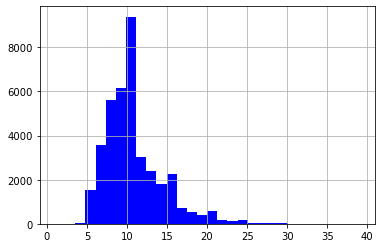

In [15]:
pd.Series(title_wordcount).hist(bins = 30,color='blue')

<AxesSubplot:>

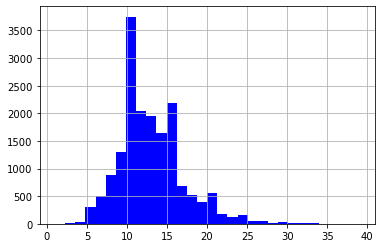

In [16]:
# Fake news titles

df2 = df.loc[df['label']==1]
fake_title_wordcount = df2['title_stopremoved'].apply(len)
pd.Series(fake_title_wordcount).hist(bins = 30,color='blue')

In [17]:
f_title_freq = df2['title_stopremoved']

def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, i]) for word, i in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]

freq_fake_title = get_most_freq_words([ word for word in f_title_freq for word in word],10)
freq_fake_title

[('trump', 7602),
 ('video', 6012),
 ('obama', 1693),
 ('watch', 1532),
 ('hillary', 1484),
 ('president', 791),
 ('clinton', 785),
 ('gop', 733),
 ('donald', 732),
 ('white', 658)]

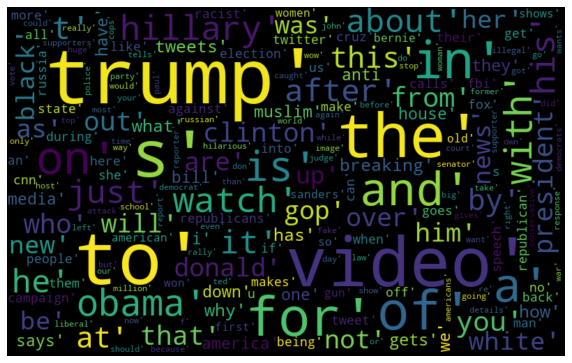

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df2 = df.loc[df['label']==1]
fake_data_ti = df2['title_tokenized'] .apply(str)

fake_data_title = ' '.join([text for text in fake_data_ti])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(fake_data_title)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

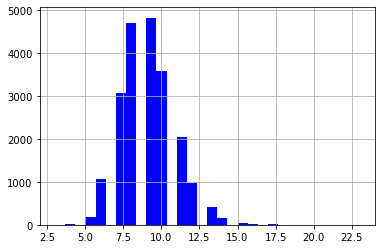

In [19]:
# True news titles

df3 = df.loc[df['label']==0]
true_title_wordcount = df3['title_stopremoved'].apply(len)
pd.Series(true_title_wordcount).hist(bins = 30,color='blue')

In [20]:
t_title_freq = df3['title_stopremoved']

def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, i]) for word, i in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]

freq_true_title = get_most_freq_words([ word for word in t_title_freq for word in word],10)
freq_true_title

[('trump', 5510),
 ('says', 2958),
 ('house', 1443),
 ('russia', 965),
 ('north', 909),
 ('korea', 883),
 ('new', 871),
 ('white', 812),
 ('china', 774),
 ('senate', 756)]

In [21]:
list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-21-d902e7430f30>, line 1)

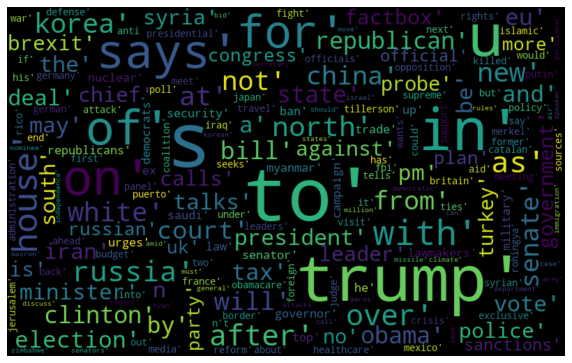

In [22]:
df3 = df.loc[df['label']==0]

true_data_ti = df3['title_tokenized'] .apply(str)

true_data_title = ' '.join([text for text in true_data_ti])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(true_data_title)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#title_tag = df['title_stopremoved'].to_numpy()
# from sklearn.feature_extraction.text import TfidfVectorizer 
 
# # settings that you use for count vectorizer will go here 
# tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# # just send in all your docs here 
# tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(title_tag)
# nltk.pos_tag(title_tag)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
# cv=CountVectorizer(max_features=1000)
# vect=cv.fit_transform(df['title_stopremoved'].toarray()
# vect

In [23]:
# Totenizing text
###title_token = word_tokenize(data['title'])
df['text_tokenized'] = df['text'].apply(word_tokenize)
df['text_tokenized'].head()

0    [Donald, Trump, just, couldn, t, wish, all, Am...
1    [House, Intelligence, Committee, Chairman, Dev...
2    [On, Friday, ,, it, was, revealed, that, forme...
3    [On, Christmas, day, ,, Donald, Trump, announc...
4    [Pope, Francis, used, his, annual, Christmas, ...
Name: text_tokenized, dtype: object

In [24]:
df['text_stopremoved'] = df['text_tokenized'].apply(lambda x: [item for item in x if item not in stop])
df['text_stopremoved'].head()

0    [Donald, Trump, wish, Americans, Happy, New, Y...
1    [House, Intelligence, Committee, Chairman, Dev...
2    [On, Friday, ,, revealed, former, Milwaukee, S...
3    [On, Christmas, day, ,, Donald, Trump, announc...
4    [Pope, Francis, used, annual, Christmas, Day, ...
Name: text_stopremoved, dtype: object

In [25]:
text_wordcount= df['text_stopremoved'].apply(len)
df['text_wordcount']=text_wordcount
df.head()

,articlesid,fakeid,trueid,title,text,subject,label,title_tokenized,title_stopremoved,title_wordcount,text_tokenized,text_stopremoved,text_wordcount
0,1,1.0,NaN,donald trump sends out embarrassing new year’...,Donald Trump just couldn t wish all Americans ...,US News,1,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, embarrassing, new, year...",11,"[Donald, Trump, just, couldn, t, wish, all, Am...","[Donald, Trump, wish, Americans, Happy, New, Y...",406
1,2,2.0,NaN,drunk bragging trump staffer started russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus...",8,"[House, Intelligence, Committee, Chairman, Dev...","[House, Intelligence, Committee, Chairman, Dev...",211
2,3,3.0,NaN,sheriff david clarke becomes an internet joke...,"On Friday, it was revealed that former Milwauk...",US News,1,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, internet, jo...",12,"[On, Friday, ,, it, was, revealed, that, forme...","[On, Friday, ,, revealed, former, Milwaukee, S...",469
3,4,4.0,NaN,trump is so obsessed he even has obama’s name...,"On Christmas day, Donald Trump announced that ...",US News,1,"[trump, is, so, obsessed, he, even, has, obama...","[trump, obsessed, even, obama, ’, name, coded,...",11,"[On, Christmas, day, ,, Donald, Trump, announc...","[On, Christmas, day, ,, Donald, Trump, announc...",356
4,5,5.0,NaN,pope francis just called out donald trump dur...,Pope Francis used his annual Christmas Day mes...,US News,1,"[pope, francis, just, called, out, donald, tru...","[pope, francis, called, donald, trump, christm...",7,"[Pope, Francis, used, his, annual, Christmas, ...","[Pope, Francis, used, annual, Christmas, Day, ...",261


<AxesSubplot:>

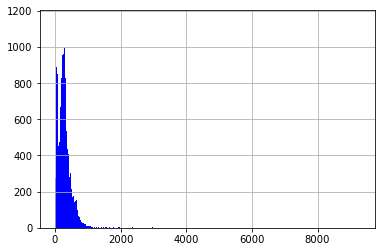

In [26]:
pd.Series(text_wordcount).hist(bins = 1000,color='blue')

<AxesSubplot:>

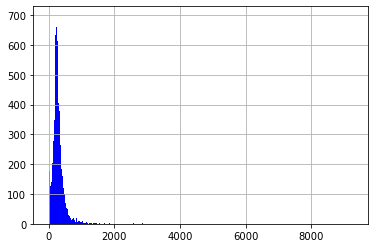

In [27]:
# Fake news text

df4 = df.loc[df['label']==1]
fake_text_wordcount = df4['text_stopremoved'].apply(len)
pd.Series(fake_text_wordcount).hist(bins = 1000,color='blue')

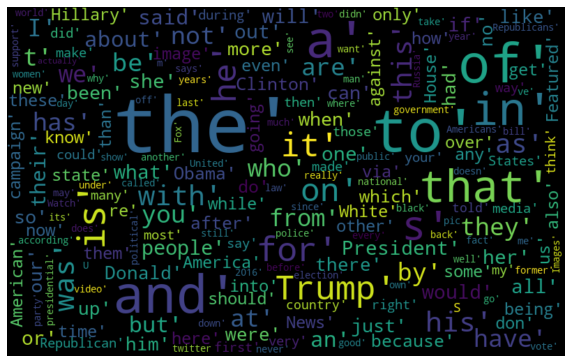

In [28]:
df4 = df.loc[df['label']==1]
fake_data_tx = df4['text_tokenized'] .apply(str)

fake_data_text = ' '.join([text for text in fake_data_tx])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(fake_data_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

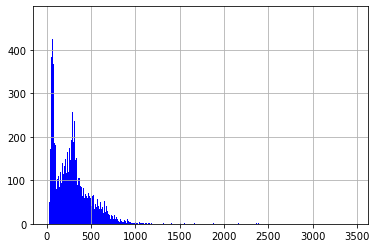

In [29]:
# True news text

df5 = df.loc[df['label']==0]
true_text_wordcount = df5['text_stopremoved'].apply(len)
pd.Series(true_text_wordcount).hist(bins = 1000,color='blue')

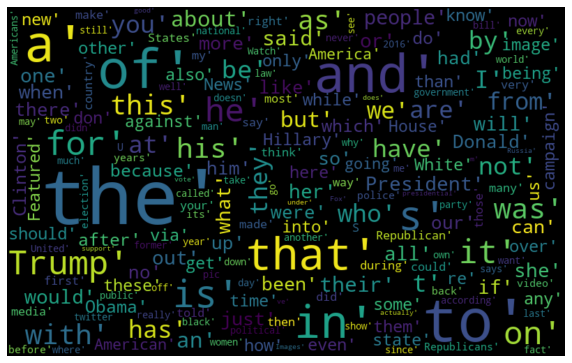

In [30]:
df5 = df.loc[df['label']==1]
true_data_tx = df4['text_tokenized'] .apply(str)

true_data_text = ' '.join([text for text in true_data_tx])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(true_data_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# Initial imports
import pandas as pd
from path import Path
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [32]:
#defining the feature set X and y
X = df.drop(columns=['title', 'text', 'subject', 'label', 'title_tokenized', 'title_stopremoved', 'text_tokenized', 'text_stopremoved'])
y = df['label']

# Splitting into Train and Test sets into an 80/20 split.
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [33]:
### NEW ADDITION
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 2


In [34]:
y_pred = model.predict(X_train)
y_pred

array([2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 2, 2, 0, 1, 2, 0])

In [35]:
accuracy = accuracy_score(y_train, y_pred)*100
accuracy
# def accuracy(y_train,y_pred,normalize=True):
#     accuracy=[]
#     for i in range(len(y_pred)):
#         if y_pred[i]==y_train[i]:
#             accuracy.append(1)
#         else:
#             accuracy.append(0)
#     if normalize==True:
#         return np.mean(accuracy)
#     if normalize==False:
#         return sum(accuracy)

95.83333333333334

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [30, 120]

In [36]:
# # Splitting into Train and Test sets into an 80/20 split.
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

# # Creating a StandardScaler instance.
# scaler = StandardScaler()
# # Fitting the Standard Scaler with the training data.
# X_scaler = scaler.fit(X_train)

# # Scaling the data.
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [37]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,
#    y,  random_state=1, stratify=y)
# X_train.shape

# from sklearn.svm import SVC
# model = SVC(kernel='linear')

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# results = pd.DataFrame({
#    "Prediction": y_pred,
#    "Actual": y_test
# }).reset_index(drop=True)
# results.head()

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

# # Confusion Matrix

# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred)

# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))